In [1]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
"""
Worked example showing why our previous approach won't work when a metapath
contains multiple repeated node types that interleave.

Construct a graph below with two different node sets, A = [0,1] and B = [2,3,4].
Look at the metapath BABA.
"""

"\nWorked example showing why our previous approach won't work when a metapath\ncontains multiple repeated node types that interleave.\n\nConstruct a graph below with two different node sets, A = [0,1] and B = [2,3,4].\nLook at the metapath BABA.\n"

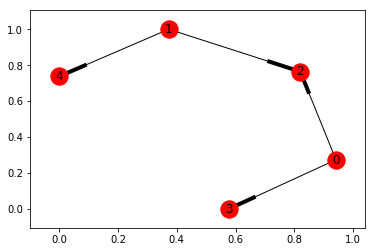

[[0 0 1 1 0]
 [0 0 1 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [2]:
# Make first set of edges, from A to B

G1 = nx.DiGraph()

G1.add_nodes_from([0,1,2,3,4])
G1.add_edges_from([[0,2], [0,3], [1,4], [1,2]])

plt.clf()
nx.draw_networkx(G1)
plt.show()

A = nx.adjacency_matrix(G1)
print(A.todense())

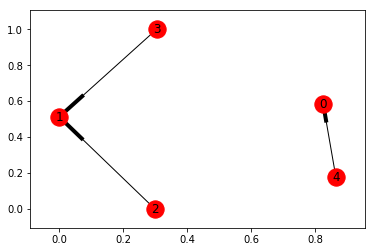

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]


In [3]:
# Edges from B to A
G2 = nx.DiGraph()

G2.add_nodes_from([0,1,2,3,4])
G2.add_edges_from([[2,1], [3,1], [4,0]])

plt.clf()
nx.draw_networkx(G2)
plt.show()

B = nx.adjacency_matrix(G2)
print(B.todense())

In [4]:
# Walk count matrix
# This displays all walks from B to A to B to A
print( (B@A@B).todense() )

[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 2 0 0 0]]


In [5]:
# Path count when subtracting loops at B nodes
print((B@A - np.diag((B@A).diagonal()) )@B)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [0 2 0 0 0]]


In [6]:
# Path count when subtracting loops at A nodes
# NOTE: it turns out this matrix equals the correct matrix,
# although that is a coincidence and will not hold in general
print( B@(A@B - np.diag((A@B).diagonal())) )

[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]]


In [7]:
# When we subtract loops at A nodes and at B nodes, we overcompensate and get the wrong result
print(  B@A@B - np.diag((B@A).diagonal())@B  -  B@np.diag((A@B).diagonal())  )

[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1 -1  0  0  0]
 [ 1  0  0  0  0]
 [ 0  2  0  0  0]]
